<a href="https://colab.research.google.com/github/Habibur-02/76a/blob/main/Data_processing_and_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

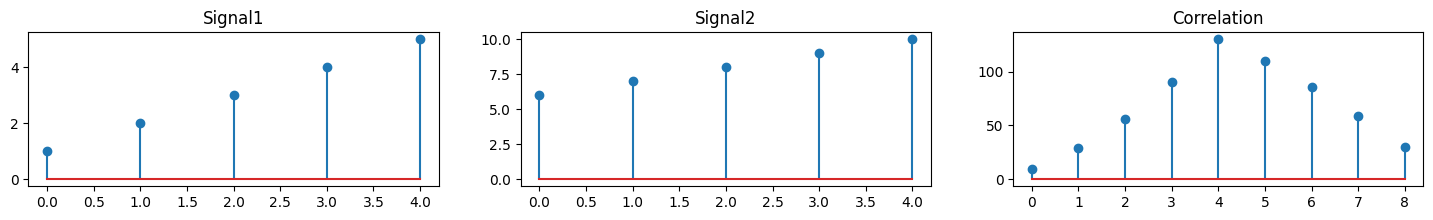

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
signal1 = np.array([1, 2, 3, 4, 5])
signal2 = np.array([6,7,8,9,10])
cor = np.array([])
padding = np.array([0,0,0,0])
signal1= np.insert(signal1, 0, padding)
signal1=np.append(signal1, padding)
s=0
for i in range(9):
  for j in range(5):
    s += (signal1[i+j]*signal2[j])
  cor = np.append(cor,s)
  s=0
fig, axs = plt.subplots(1,3,figsize=(18,2))
signal1 = signal1[signal1 > 0]
axs[0].stem(signal1)
axs[0].set_title('Signal1')
axs[1].stem(signal2)
axs[1].set_title('Signal2')
axs[2].stem(cor)
axs[2].set_title('Correlation')
plt.show()

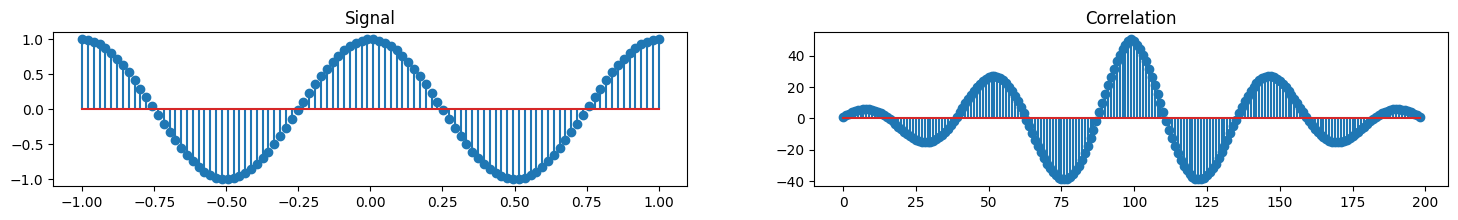

In [ ]:
x_t = np.linspace(-1,1,100)
y_t = np.cos(2*np.pi*x_t)
y_cor = np.correlate(y_t, y_t, mode='full')
fig, axs = plt.subplots(1,2,figsize=(18,2))
axs[0].stem(x_t,y_t)
axs[0].set_title('Signal')
axs[1].stem(y_cor)
axs[1].set_title('Correlation')
plt.show()

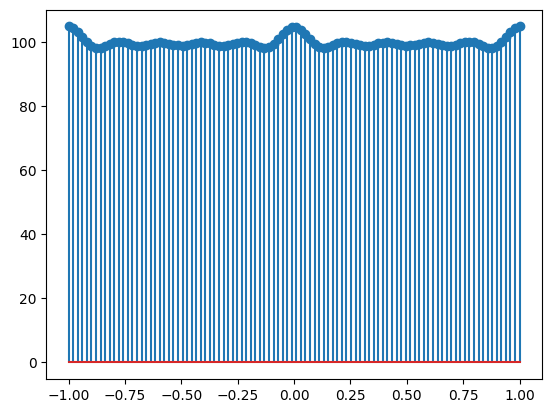

In [ ]:
f=5
y_s = np.array(100)
for i in range(f):
  y_s = np.add(y_s,np.cos(2*np.pi*(i+1)*x_t))
plt.stem(x_t,y_s)
plt.show()

In [ ]:
import kagglehub

# Download latest version of the dataset
path = kagglehub.dataset_download("lakshmi25npathi/imdb-dataset-of-50k-movie-reviews")

# Print the dataset path
print("Path to dataset files:", path)

import pandas as pd
df = pd.read_csv(path+'/IMDB Dataset.csv')
df



Path to dataset files: /root/.cache/kagglehub/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews/versions/1


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


**Lower Case letter**


In [ ]:

# df.info()
df['review'][1]

df['review']=df['review'].str.lower()
df


,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. <br /><br />the...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive
...,...,...
49995,i thought this movie did a down right good job...,positive
49996,"bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,i am a catholic taught in parochial elementary...,negative
49998,i'm going to have to disagree with the previou...,negative


**Remove All HTML Tags**

```
# This is formatted as code
Here i found a lot of HTML TAgs
```



✈



In [ ]:
import re
def remove_html_tags(text):
  pattarn=re.compile(r'<.*?>')
  return pattarn.sub(r'',text)

remove_html_tags(df['review'][2])

df['review']=df['review'].apply(remove_html_tags)
df['review'][4]


'Petter Matteis Love in the Time of Money is a visually stunning film to watch Mr Mattei offers us a vivid portrait about human relations This is a movie that seems to be telling us what money power and success do to people in the different situations we encounter br br This being a variation on the Arthur Schnitzlers play about the same theme the director transfers the action to the present time New York where all these different characters meet and connect Each one is connected in one way or another to the next person but no one seems to know the previous point of contact Stylishly the film has a sophisticated luxurious look We are taken to see how these people live and the world they live in their own habitatbr br The only thing one gets out of all these souls in the picture is the different stages of loneliness each one inhabits A big city is not exactly the best place in which human relations find sincere fulfillment as one discerns is the case with most of the people we encounter

# **Remove URL**


```
# This is formatted as code
Here may be time complexity is
```



In [ ]:
import re
def remove_url(text):
  pattarn=re.compile(r'https?://\S+|www\.\S+')
  return pattarn.sub(r'',text)
remove_url(df['review'][4])
text = 'For data click https://www.kaggle.com/'
remove_url(text)

'For data click '

# **Puncuation Remove**

In [ ]:
import string,time
string.punctuation
time.time()

pattarn=string.punctuation

def remove_punctuation(text):
  for i in pattarn:
    text=text.replace(i,'')
  return text

remove_punctuation(df['review'][4])

df['review']=df['review'].apply(remove_punctuation)
df['review']


# Better Time Coplexicity,but not the best

def remove_punc1(text):
    return text.translate(str.maketrans('', '', exclude))



# **Chat Conversation**

In [ ]:
chat_words = {
    'AFAIK':'As Far As I Know',
    'AFK':'Away From Keyboard',
    'ASAP':'As Soon As Possible'
}


{
    "FYI": "For Your Information",
    "ASAP": "As Soon As Possible",
    "BRB": "Be Right Back",
    "BTW": "By The Way",
    "OMG": "Oh My God",
    "IMO": "In My Opinion",
    "LOL": "Laugh Out Loud",
    "TTYL": "Talk To You Later",
    "GTG": "Got To Go",
    "TTYT": "Talk To You Tomorrow",
    "IDK": "I Don't Know",
    "TMI": "Too Much Information",
    "IMHO": "In My Humble Opinion",
    "ICYMI": "In Case You Missed It",
    "AFAIK": "As Far As I Know",
    "BTW": "By The Way",
    "FAQ": "Frequently Asked Questions",
    "TGIF": "Thank God It's Friday",
    "FYA": "For Your Action",
    "ICYMI": "In Case You Missed It",
}



def chat_conversion(text):
    new_text = []
    for w in text.split():
        if w.upper() in chat_words:
            new_text.append(chat_words[w.upper()])
        else:
            new_text.append(w)
    return " ".join(new_text)

chat_conversion("ASAP DO it")
df['review']=df['review'].apply(chat_conversion)
df['review'][4]


'Petter Matteis Love in the Time of Money is a visually stunning film to watch Mr Mattei offers us a vivid portrait about human relations This is a movie that seems to be telling us what money power and success do to people in the different situations we encounter br br This being a variation on the Arthur Schnitzlers play about the same theme the director transfers the action to the present time New York where all these different characters meet and connect Each one is connected in one way or another to the next person but no one seems to know the previous point of contact Stylishly the film has a sophisticated luxurious look We are taken to see how these people live and the world they live in their own habitatbr br The only thing one gets out of all these souls in the picture is the different stages of loneliness each one inhabits A big city is not exactly the best place in which human relations find sincere fulfillment as one discerns is the case with most of the people we encounter

# **Text Correction**

In [ ]:
# from textblob import TextBlob

# incorrect_text = 'ceertain conditionas duriing seveal ggenerations aree moodified in the saame maner.'

# def text_correction(text):
#   textBlb = TextBlob(text)
#   textBlb.correct().string
#   return textBlb.correct().string
# df['review']=df['review'].apply(lambda x: text_correction(x))
# df['review'][4]

!pip install symspellpy
from symspellpy import SymSpell, Verbosity

# Initialize SymSpell with max edit distance 2
sym_spell = SymSpell(max_dictionary_edit_distance=2, prefix_length=7)

# Download & Load a large English dictionary (pre-trained)
!wget https://raw.githubusercontent.com/wolfgarbe/SymSpell/master/SymSpell/frequency_dictionary_en_82_765.txt

# Load dictionary
sym_spell.load_dictionary("frequency_dictionary_en_82_765.txt", term_index=0, count_index=1)

def correct_word(text):
  # Example text with spelling mistakes
  # text = "Ths is an exmple of spleling correction."
  if text is None:
       return ''
  # Tokenize the text into words
  words = text.split()

  # Correct each word using SymSpell
  corrected_words = [sym_spell.lookup(word, Verbosity.CLOSEST, max_edit_distance=2)[0].term if sym_spell.lookup(word, Verbosity.CLOSEST, max_edit_distance=2) else word for word in words]

  # Join corrected words back into a sentence
  corrected_text = " ".join(corrected_words)

df['review']=df['review'].apply(correct_word)
df['review'][4]




--2025-03-13 11:25:51--  https://raw.githubusercontent.com/wolfgarbe/SymSpell/master/SymSpell/frequency_dictionary_en_82_765.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1332881 (1.3M) [text/plain]
Saving to: ‘frequency_dictionary_en_82_765.txt.5’

frequency_dictionar 100%[===================>]   1.27M  --.-KB/s    in 0.07s   

2025-03-13 11:25:51 (19.1 MB/s) - ‘frequency_dictionary_en_82_765.txt.5’ saved [1332881/1332881]



KeyboardInterrupt: 

**stopwords**

In [ ]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:


stopwords.words('english')



['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [ ]:
df=df.head(1000)
def remove_stopwords(text):
    new_text = []

    for word in text.split():
        if word in stopwords.words('english'):
            new_text.append('')
        else:
            new_text.append(word)
    x = new_text[:]
    new_text.clear()
    return " ".join(x)

df['review'].apply(remove_stopwords)

,review
0,One reviewers mentioned watching 1 Oz e...
1,A wonderful little production br br The filmin...
2,I thought wonderful way spend time hot ...
3,Basically theres family little boy Jake thi...
4,Petter Matteis Love Time Money visually s...
...,...
95,Daniel DayLewis versatile actor alive Engli...
96,My guess would originally going least tw...
97,Well I like watch bad horror BMovies cause I ...
98,This IS worst movie I ever seen well wors...


# **Emoji Handle**

In [1]:
import re
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)